# K-means clustering

1. Choose the number of clusters
2. Specify the cluster seeds or starting centroids (chosen randomly or by data scientist who has the prior-knowledge about the data)
3. Assign each point to a centroid/seed based on proximity. For example, based on wherether a point is closer to a green seed or an orange seed (using EUCLEDIAN formula)
4. Adjust the centroids of orange points and green points

Come back to step 3, reassign the points to the adjusted centroids of the two cluster

We completes the clustering when we can no longer reassign points

# Simple example of clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans


## Load the data

In [2]:
data = pd.read_csv("datasets/3.01. Country clusters.csv")

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

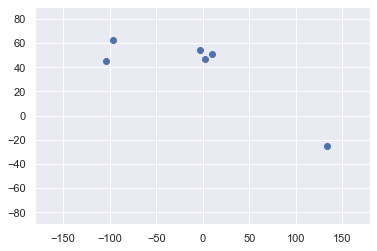

In [4]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Selects the feature

In [5]:
x= data.iloc[:, 1:3]

In [6]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


 ## Clustering

In [7]:
kmeans = KMeans(3)

In [8]:
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [10]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


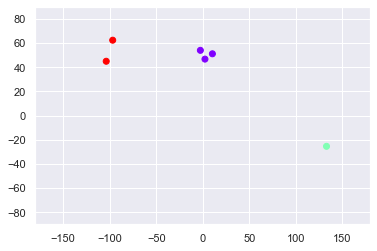

In [11]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Clustering categorical data

## Map the data

In [12]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French': 1, 'German': 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


 ## Selet features

In [13]:
x = data_mapped.iloc[:, 1:]

In [14]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [15]:
kmeans = KMeans(2)

In [16]:
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [17]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 0])

In [18]:
data_mapped['Cluster'] = identified_clusters

In [19]:
data_mapped

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


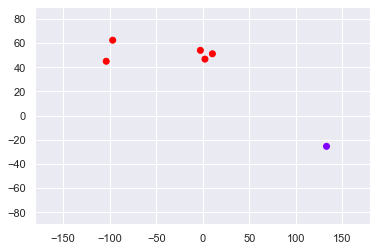

In [20]:
plt.scatter (data_mapped['Longitude'], data_mapped['Latitude'], c=data_mapped['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

# How to choose the number of clustering
The elbow method

1) minimizing the distance between points in a cluster == 2) maximizing the distance between cluster

distance between points in a cluster => is within-cluster sum of squares (WCSS)

Similar to SST, SSR, SSE, WCSS is a measure developed within the ANOVA framework

If we minimize WCSS, we have reached the perfect clustering solution

If we have 6 observations, and 6 clusters, WCSS = 0 XXX

If we have 1000000 clusters, WCSS=max XXX

<strong style="color:red;">WCSS Middle ground: Observations: N, small number of clusters, and WCSS is as small as possible<strong>

<img src="images/cluster_elbow.png">

### WCSS

In [21]:
kmeans.inertia_
# this is the within-cluster sum of squares

13208.958119999996

In [22]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\sw04cstl\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### The elbow method

Text(0, 0.5, 'Within-cluster Sum of Squares')

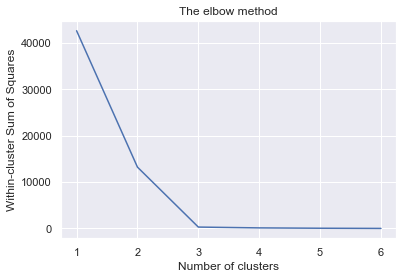

In [24]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

# Pros and cons of K-means and clustering

Pros
* Simple to understand 
* Faster to cluster
* Widely available 
* Easy to implement

Cons 
* We need to pick k -> Remedy: The Elbow method
* Sensitive to initalization: since K-mean takes closest point to the seed, can be problematic if choose the wrong seed -> Remedy: K-means++ (a preliminary algorithm run prior to kmeans to determine appropriate seed)
* Sensitive to outliers: If a single point is to far from the rest, it is placed in a seperate cluster. -> Remedy: remove outliers
* Produces spherical solutions (in 2D, spherical solution instead of elliptic solution)
* Standardization

# Standardize or not standardize

The ultimate aim of standardization is to reduce the weights of higher number

When standardizing, both axises have the same scale. However by nature each has its own scale in the real world (size<2000, Price<100000)

By standardizing, both axes, we removed the weight introduced by the high price values

If we dont standardize, the range of the values serve as serve as weights for each variable. Price is much higher, indicates to K-means that price is more important. Standardize by the price. => if we dont standardize, we are not taking the advantage of the size => 

Standardization is trying to put all variables on equal footing. If we know that one variable is inherantly more important than the other, standardization should not be used.

# Relationship between clustering and regression

<img src="images/regression&cluster.png">

* Small expensive apartments are those in the center of the city
* Big cheap apartments are those in the suburd of the city

=> Identify Omitted Variable Bias => clustering helps explore data, realize one variable should be included in the model for prediction (the location)

# Market segmentation with Cluster Analysis

## Load data

In [27]:
data = pd.read_csv("datasets/3.12. Example.csv")

In [28]:
data
# satisfaction 1-10
# brand loyalty: churn rate, retention rate, customer lifetime value -> has been standardized: from -2.5 to 2.5

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


# Plot the data


Text(0, 0.5, 'Loyalty')

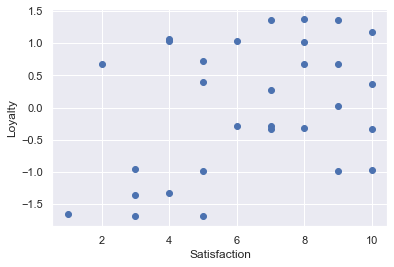

In [29]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

## Select features

In [30]:
x = data.copy()

## Clustering

In [31]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering result

In [32]:
cluster_result = x.copy()
cluster_result['Cluster'] = kmeans.fit_predict(x)

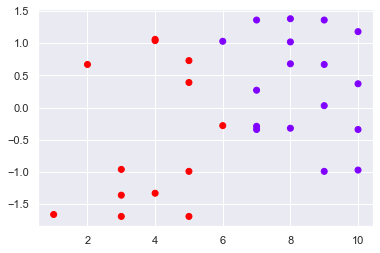

In [33]:
plt.scatter(cluster_result['Satisfaction'], cluster_result['Loyalty'], c=cluster_result['Cluster'], cmap='rainbow')

<strong>Here the algorithm only considers the satisfaction as a feature (since satisfaction has a bigger scale, bigger impact) => we have not standardize the variable</strong>

## Standardize the Satisfaction to give the both features an equal weight

In [34]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [35]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take the advantage of the Elbow method to determine the right number of clusters

In [36]:
wcss = []

In [37]:
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\sw04cstl\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.423830011052963,
 4.315662464700004,
 3.7853513108384]

Text(0, 0.5, 'Within Cluster Sum Of Square')

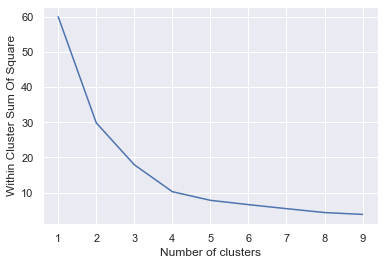

In [39]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum Of Square')

There are 4 tips worth to try: 2, 3, 4, 5

## Explore clustering solutions and select the number of clusters

### Two

In [40]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
cluster_result_new = x.copy()
cluster_result_new['Cluster'] = kmeans_new.fit_predict(x_scaled)

In [41]:
cluster_result_new
# will plot the non-standardized feature data with the cluster info of the standarddized feature data

,Satisfaction,Loyalty,Cluster
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

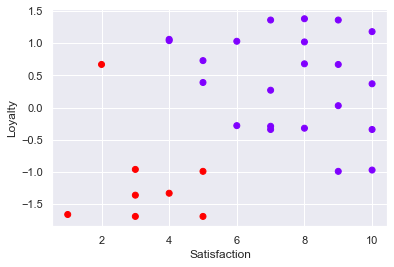

In [42]:
plt.scatter(cluster_result['Satisfaction'], cluster_result['Loyalty'], c=cluster_result_new['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

* compare to the previous result, both dimensions are taken into account
* One contains those that have low loyalty and low satisfaction (alienated)
* The other one is more heterogenous (everything else)


### Three

In [44]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
cluster_result_new = x.copy()
cluster_result_new['Cluster'] = kmeans_new.fit_predict(x_scaled)

Text(0, 0.5, 'Loyalty')

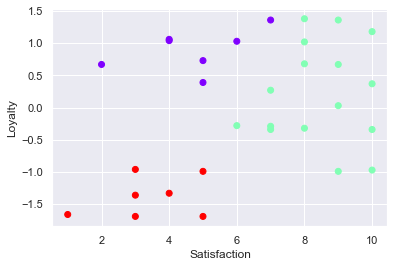

In [45]:
plt.scatter(cluster_result['Satisfaction'], cluster_result['Loyalty'], c=cluster_result_new['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

* alienated - red
* supporters: not happy but willing to come back - purple
* everythigng else - green

### Four

In [46]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
cluster_result_new = x.copy()
cluster_result_new['Cluster'] = kmeans_new.fit_predict(x_scaled)

Text(0, 0.5, 'Loyalty')

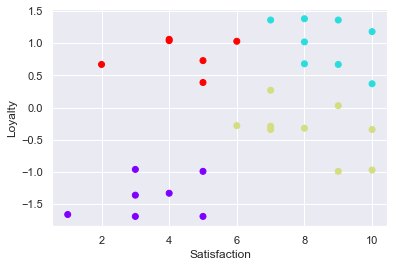

In [47]:
plt.scatter(cluster_result['Satisfaction'], cluster_result['Loyalty'], c=cluster_result_new['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

* Alienated
* Supporters
* Fans
* Roamers

### Five

In [48]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
cluster_result_new = x.copy()
cluster_result_new['Cluster'] = kmeans_new.fit_predict(x_scaled)

Text(0, 0.5, 'Loyalty')

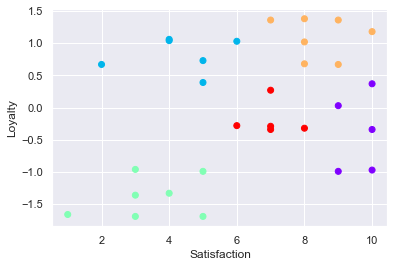

In [49]:
plt.scatter(cluster_result['Satisfaction'], cluster_result['Loyalty'], c=cluster_result_new['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

* Alienated
* Supporters
* Fans
* Roamers (divided into two)

## How clustering is useful

Three types of analysis:
* Exploratory: get acquainted with the data, search for pattern, and plan, without trying to explain anything
    
    ** Data visualization
    
    ** Descriptive
    
    ** Clustering
    
* Confirmatory: 
* Explanatory:

=> The other two aims at explaining a phenomenon, confirm a hypothesis, validate research => using hypothesis testing and regression analysis

The above problem is an example of explanatory market segmentation.

Clustering can also be used as confirmation of the past beliefs => but rare as classification better

Advantage: Clustering solution can look different as the market has changed

### Application for the previous Example 

* Turn supporters into fan by addressing their feedbacks